# Ejemplo con clasificador de Naive Bayes

Consideremos un conjunto de datos artificial sobre el cual podamos probar un clasificador de Naive Bayes:

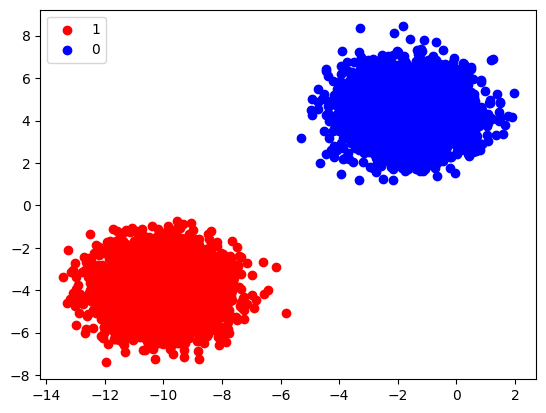

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

X, y = make_blobs(n_samples=10000, centers=2, n_features=2, random_state=1)

# esta función ajusta una gausiana 
# a un conjunto 'data' 
def fit_distribution(data): 
  mu = data.mean()
  sigma = data.std() 
  dist = norm(mu, sigma)
  return dist



plt.scatter(X[y==1][:,0], X[y==1][:,1], label = '1', color='red')
plt.scatter(X[y==0][:,0], X[y==0][:,1], label = '0', color = 'blue')
plt.legend()


Consideramos un modelo de clasificacion de Naive Bayes:

$$
P(c \vert x) = P(x \vert c)P(c)
$$

donde $P(c)$ es la probabilidad prior dada una clase $c$ y $P(x\vert c)$ es la verosimilitud de $x$ dada la una clase $c$, con Naive Bayes esto resulta en: 

$$
P(c \vert x) = P(c)\prod_iP(x_i \vert c)
$$

Lo cual para nuestro caso (`n_features=2`) se traduce en: 

$$
P(c \vert x) = \underbrace{P(c)}_{\text{prior}} \underbrace{P(x_0 \vert c) P(x_1 \vert c)}_{\text{likelihood}}
$$

In [2]:
# calculamos priors
def prior(c):
  return len(X[y==c])/len(X)

# tenemos cuatro posibles distribuciones a ajustar (verosimilitud)
def distX0(c):
  if c==0:
    return fit_distribution(X[y==0][:,0])
  elif c==1:
    return fit_distribution(X[y==1][:,0])

def distX1(c):
  if c==0:
    return fit_distribution(X[y==0][:,1])
  elif c==1:
    return fit_distribution(X[y==1][:,1])

# verosimilitud
def likelihood(X, c):
  return distX0(c).pdf(X[0])*distX1(c).pdf(X[1])

# posterior
def probability(c, X):
  return prior(c)*likelihood(X,c)

predictions = [np.argmax([probability(0, vector), probability(1, vector)]) for vector in X]

Al final la distribución posterior nos da la probabilidad de que un dato `X` corresponda a una clase `c`. Luego de esto evaluamos el ajuste del modelo de clasificación al dataset artificial con una matriz de confusión:  

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predictions)

array([[5000,    0],
       [   0, 5000]])

Donde vemos que la distribución ajusta perfectamente los datos, de lo cual podemos también estimar la clase para otros puntos que no estaban inicialmente en el dataset:

In [15]:
def class_distribution(x, y):
  return np.argmax([probability(0, [x,y]), probability(1, [x,y])])

class_distribution(-6, 0)

1

In [16]:
class_distribution(-4, 0)

0

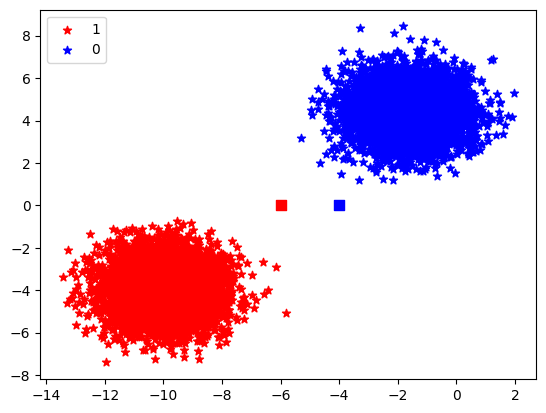

In [6]:
plt.scatter(X[y==1][:,0], X[y==1][:,1], label = '1', color='red', marker = '*')
plt.scatter(X[y==0][:,0], X[y==0][:,1], label = '0', color = 'blue', marker='*')
plt.scatter(-6, 0, color = 'red', marker='s', s=53)
plt.scatter(-4, 0, color = 'blue', marker='s', s=53)
plt.legend()

En este plot anterior se evidencia cómo el clasificador basado en una distribución posterior puede clasificar puntos que no estaban en el conjunto de datos inicial (puntos con forma de cuadrado), permitiendo de esta manera extrapolar las funciones de clasificación mas allá de los datos iniciales.